## Install necessary libraries

In [1]:
install.packages("outlierensembles")

Installing package into ‘/home/yram0006/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [3]:
install.packages("factoextra")

Installing package into ‘/home/yram0006/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [4]:
install.packages('devtools')
devtools::install_github('jhmadsen/DDoutlier')

Installing package into ‘/home/yram0006/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Skipping install of 'DDoutlier' from a github remote, the SHA1 (6408950f) has not changed since last install.
  Use `force = TRUE` to force installation



In [36]:
# install.packages("devtools")
devtools::install_github("sevvandi/outlierensembles")

crayon       (1.4.1      -> 1.5.0     ) [CRAN]
cli          (3.0.1      -> 3.2.0     ) [CRAN]
pillar       (1.6.3      -> 1.7.0     ) [CRAN]
fansi        (0.5.0      -> 1.0.2     ) [CRAN]
stringi      (1.7.4      -> 1.7.6     ) [CRAN]
xfun         (0.26       -> 0.29      ) [CRAN]
yaml         (2.2.1      -> 2.2.2     ) [CRAN]
jsonlite     (1.7.2      -> 1.7.3     ) [CRAN]
backports    (1.2.1      -> 1.4.1     ) [CRAN]
magrittr     (2.0.1      -> 2.0.2     ) [CRAN]
knitr        (1.34       -> 1.37      ) [CRAN]
withr        (2.4.2      -> 2.4.3     ) [CRAN]
tibble       (3.1.4      -> 3.1.6     ) [CRAN]
rlang        (0.4.11     -> 1.0.1     ) [CRAN]
glue         (1.4.2      -> 1.6.1     ) [CRAN]
digest       (0.6.28     -> 0.6.29    ) [CRAN]
viridis      (0.6.1      -> 0.6.2     ) [CRAN]
htmlTable    (2.2.1      -> 2.4.0     ) [CRAN]
data.table   (1.14.0     -> 1.14.2    ) [CRAN]
generics     (0.1.0      -> 0.1.2     ) [CRAN]
Hmisc        (4.5-0      -> 4.6-0     ) [CRAN]
cpp11        

Installing 31 packages: crayon, cli, pillar, fansi, stringi, xfun, yaml, jsonlite, backports, magrittr, knitr, withr, tibble, rlang, glue, digest, viridis, htmlTable, data.table, generics, Hmisc, cpp11, dplyr, permute, RcppArmadillo, Rcpp, tidyr, mirt, pracma, apcluster, airt

Installing packages into ‘/home/yram0006/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpLvjRy4/remotesf835f24a7ffde/sevvandi-outlierensembles-47641fc/DESCRIPTION’
─  preparing ‘outlierensembles’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘outlierensembles_0.1.1.tar.gz’
   


Installing package into ‘/home/yram0006/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



## Load libraries

In [14]:
library(outlierensembles)

## Load data

In [2]:
data.dir <- paste(getwd(), "data", sep="/")
mimic.selected.vitals <- paste(data.dir, "data_matrix_original.csv", sep="/")

## Format data

In [3]:
data <- read.csv(mimic.selected.vitals)
rownames(data) <- data$visit_occurrence_id
data <- subset(data, select = -c(X, visit_occurrence_id, person_id))
data[is.na(data)] <- 0
head(data)

,discharge_mortality_mf,one_day_mortality_mf,two_day_mortality_mf,thirty_day_mortality_mf,sixty_day_mortality_mf,ninety_day_mortality_mf,sepsis_mf,Ambulatory.Clinic...Center_mf,Ambulatory.Surgical.Center_mf,Emergency.Room...Hospital_mf,⋯,bicarbonate_first_mf,hemoglobin_first_mf,creatinine_first_mf,potassium_last_mf,chloride_last_mf,glucose_last_mf,sodium_last_mf,bicarbonate_last_mf,hemoglobin_last_mf,creatinine_last_mf
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-2147304039,0,0,0,0,0,0,1,0,0,1,⋯,1.20078798,0.33306622,-0.81544771,-1.1868193,-2.84381970,2.0315572,-0.7573356,0.8982376,0.8160591,-0.7363648
-2147002424,0,0,0,0,0,0,1,0,0,0,⋯,-2.09561862,-0.05930636,-0.97602263,-0.6680349,-0.06258867,-0.5554145,-0.5595549,-1.7088895,-1.2695849,-0.9758107
-2144345945,0,0,0,0,0,0,1,0,0,0,⋯,-0.93218100,-0.50072551,-0.09286057,1.2341746,-0.83515284,0.6783720,-0.5595549,-0.3184217,-0.8524561,-0.4171036
-2137779334,0,0,0,0,0,0,1,0,0,0,⋯,0.23125663,0.57829909,-0.81544771,-0.1492505,-0.68064001,-0.2569178,-1.9440198,0.5506206,0.8160591,-0.8161801
-2136505586,0,0,0,0,0,0,1,0,0,0,⋯,-1.12608727,-0.59881866,1.67346357,-0.1492505,-0.68064001,-0.3763165,-0.7573356,0.3768122,-0.3757374,2.6956930
-2135620132,0,0,0,0,0,0,1,0,0,0,⋯,0.03735035,-0.84405152,-0.17314803,0.8883183,-0.52612718,-1.0131095,-0.5595549,0.7244291,-0.2565578,-0.6565495


## Unsupervized Outlier detection algorithms

In [38]:
y1 <- DDoutlier::KNN_AGG(data)

In [39]:
y2 <- DDoutlier::LOF(data)

In [40]:
# y3 <- DDoutlier::COF(data, k=10)

In [41]:
y4 <- DDoutlier::INFLO(data)

In [42]:
y5 <- DDoutlier::KDEOS(data)

In [43]:
y6 <- DDoutlier::LDF(data)

In [44]:
# y7 <- DDoutlier::LDOF(data, k=10)

In [52]:
# Y <- cbind.data.frame(y1, y2, y3, y4, y5, y6$LDF, y7)
Y <- cbind.data.frame(y1, y2, y4, y6$LDF)

In [53]:
Y[1:5, ]

,y1,y2,y4,y6$LDF
,<dbl>,<dbl>,<dbl>,<dbl>
1,326.6487,1.217941,1.3140861,1.0000000
2,336.5191,1.193363,1.2133104,0.9998125
3,250.5837,1.049744,0.8295967,0.9986381
4,400.2471,1.146883,0.9483531,0.9999979
5,441.5722,1.269059,0.9197312,1.0000000


## Item Response Theory (IRT) emsemble

In [54]:
ens1 <- irt_ensemble(Y)

Warning message in sqrt(diag(solve(Hess))):
“NaNs produced”


In [55]:
ens1$scores[1:5]

[1] 6.239118 5.844438 3.731662 5.355521 5.887117

## IRT emsemble scores

In [57]:
summary(ens1$scores)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.429   5.000   5.037   5.606  21.376 

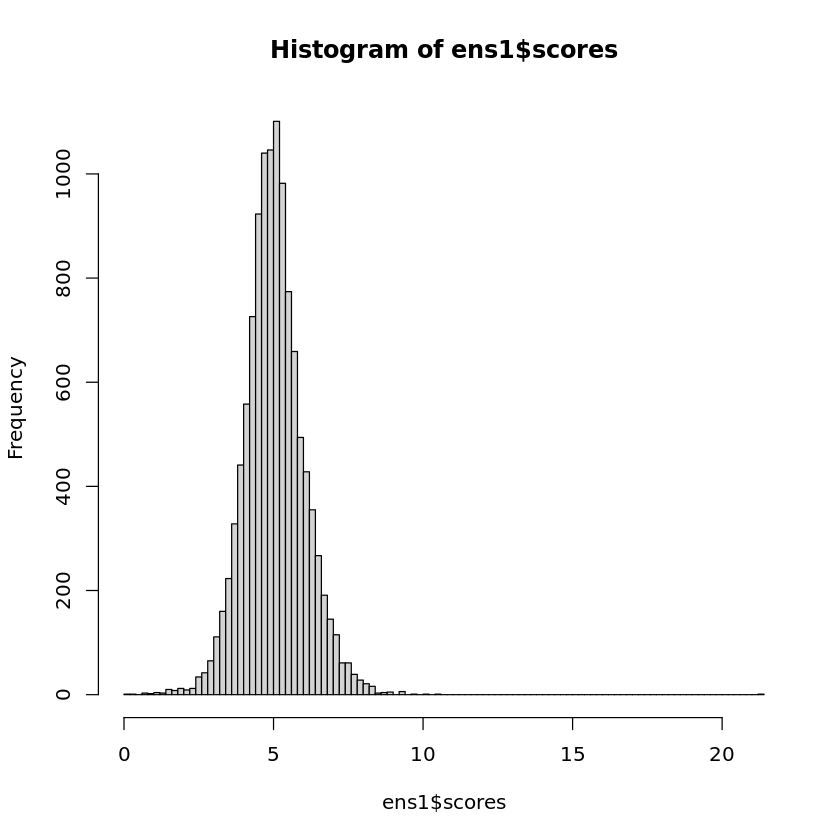

In [65]:
hist(ens1$scores, breaks = sqrt(length(ens1$scores)))

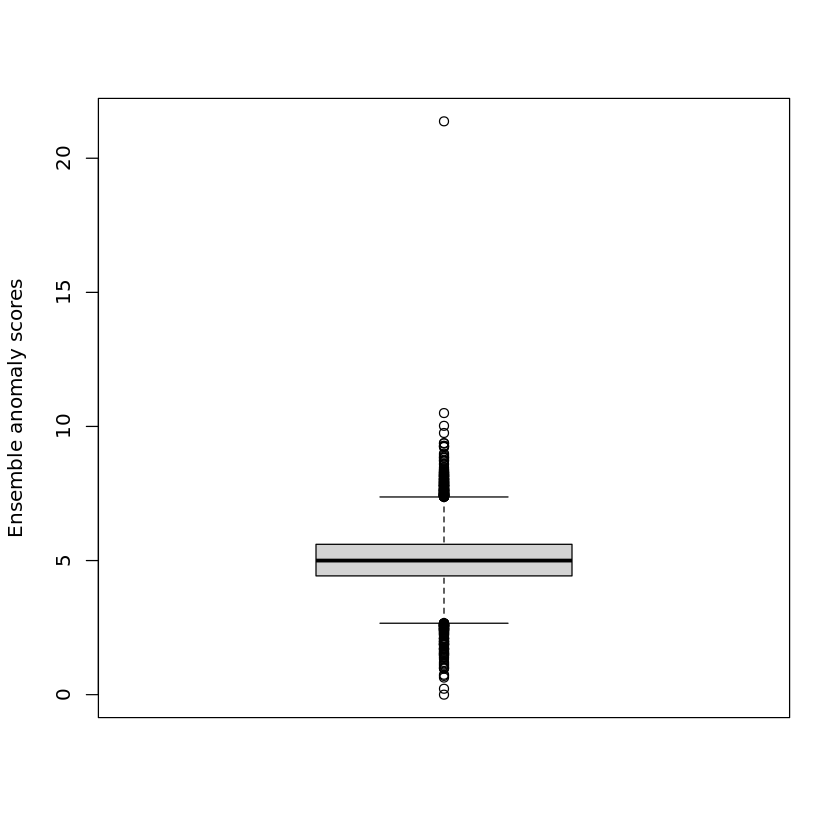

In [66]:
boxplot(ens1$scores,
  ylab = "Ensemble anomaly scores"
)

In [59]:
sum(ens1$scores > 7)

[1] 363

In [69]:
length(ens1$scores[!ens1$scores %in% boxplot.stats(ens1$scores)$out])

[1] 11211

In [70]:
length(ens1$scores)

[1] 11521

## Export

In [ ]:
df <- cbind.data.frame(data, y1, y2, y4, y5, y6$LDF, ens1$scores)

In [ ]:
colnames(df) <- list(, 'y_knn_agg', 'y_lof', 'y_inflo', 'y_kdeos', 'y_ldf', 'ensemble_scores')